# Getting started with TensorFlow Decision Forests


## References : 

Getting started with TensorFlow Decision Forests by PAUL MOONEY
https://www.kaggle.com/code/paultimothymooney/getting-started-with-tensorflow-decision-forests

TPSMAY22 EDA which makes sense by AMBROSM
https://www.kaggle.com/code/ambrosm/tpsmay22-eda-which-makes-sense/notebook

[TPS-MAY-22] In-Depth EDA + Feature Engineering by CABAXIOM
https://www.kaggle.com/code/cabaxiom/tps-may-22-in-depth-eda-feature-engineering/notebook

Analysing Interactions with SHAP by WTI 200
https://www.kaggle.com/code/wti200/analysing-interactions-with-shap/notebook





# Introduction

Step 1: Import Python packages

In [1]:
# Import Python packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def expand_feature_27(data):
    # This function was adapted from the following notebooks:
    # https://www.kaggle.com/code/cabaxiom/tps-may-22-eda-lgbm-model and
    # https://www.kaggle.com/code/ambrosm/tpsmay22-gradient-boosting-quickstart
    for df in [data]:
        # Extract the 10 letters of f_27 into individual features
        for i in range(10):
            df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
        df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))
        # Feature interactions: create three ternary features
        # Every ternary feature can have the values -1, 0 and +1
        df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
        df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
        i_00_01_26 = df.f_00 + df.f_01 + df.f_26
        df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
        return data

Step 2: Identify the location of the data

In [3]:
# print list of all data and files attached to this notebook
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


Step 3: Load the data

In [4]:
# load to pandas dataframe (for data exploration)
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')


Step 4: Explore the data

In [5]:
# print column names
print(train_df.columns)

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')


In [6]:
# preview first few rows of data
train_df.head(10)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1
5,5,1.349785,1.100418,0.562612,-0.607076,1.264728,0.283515,-1.131953,6,2,...,-2.259781,-1.308329,-2.216110,1.016892,0.273792,BDAEDBDEDA,45.890998,0,1,0
6,6,1.904853,-0.174135,0.193908,-0.559832,-0.146990,-0.538386,0.270837,2,5,...,-2.832988,2.432185,-1.827240,1.192390,-0.333300,ACBCAAAHHE,358.058637,1,0,1
7,7,0.889100,0.388168,1.062274,-1.775401,0.852494,0.335741,0.510709,2,3,...,7.956038,2.663890,-0.593400,1.528621,0.972924,BBBDBBEPDB,-113.797366,1,1,0
8,8,0.866221,0.842351,-1.367634,1.237506,0.682962,0.845666,0.173852,3,2,...,-1.241121,-1.245038,1.696402,0.354545,-0.541267,ACAEBADDAA,-52.223857,0,0,0
9,9,0.829142,-0.082872,-0.206667,-0.032502,0.366289,0.277981,-1.113467,2,0,...,-3.117106,-3.609328,2.677487,-1.772600,-3.053609,BABCBBBABD,-42.976312,0,0,1


In [7]:
# print basic summary statistics
train_df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765473,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


<AxesSubplot:>

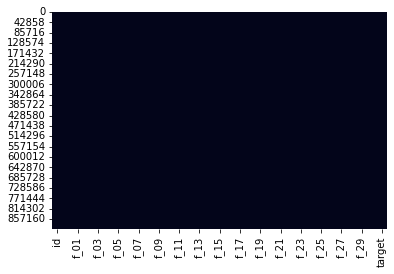

In [8]:
# check for missing values
sns.heatmap(train_df.isnull(), cbar=False)

Step 5: Feature Engineering

With reference to Correlations and Interactions notebook:
https://www.kaggle.com/code/wti200/analysing-interactions-with-shap

Observed that there is some relation between f_24 and f_25 and f_30.
Will use that info to create new features with values -1,0,1


<AxesSubplot:xlabel='f_30', ylabel='f_24'>

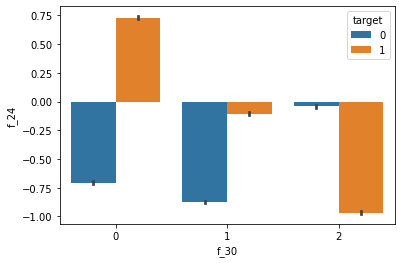

In [9]:

sns.barplot(x = 'f_30',
            y = 'f_24',
            data = train_df,
           hue = 'target')

<AxesSubplot:xlabel='f_30', ylabel='f_25'>

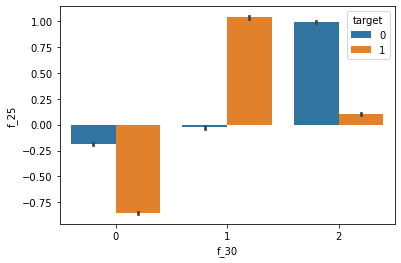

In [10]:
sns.barplot(x = 'f_30',
            y = 'f_25',
            data = train_df,
           hue = 'target')

In [11]:
# New features = i_25_30, i_24_30

#df['i_25_30'] = (df.f_30 + df.f_25 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)

def feature_engg(df):
    df['i_25_30'] = np.where( ((df['f_30'] == 0) & (df['f_25']  < -0.20)), 1,-1)

    df['i_25_30'] = np.where( ((df['f_30'] == 1) & (df['f_25'] > 0.05)), 1,-1)
                        
    df['i_25_30'] = np.where(((df['f_30'] == 2) & (df['f_25'] > 0.10)),0,-1)


    df['i_24_30'] = np.where( ((df['f_30'] == 0) & (df['f_24'] > 0)), 1,0)

    df['i_24_30'] = np.where( ((df['f_30'] == 1) & (df['f_24']  < -0.20)), 0,-1)
                        
    df['i_24_30'] = np.where(((df['f_30'] == 2) & (df['f_24'] < -0.10)),1,-1)
    
    return df
                         
                         


Here we just expand out feature number 27. There are 10 unique character positions in feature number 27, and the following bit of code expands feature 27 to instead be 10+ features instead of only one feature. Adding in this step boosts our score by >>5%.

In [12]:
print('Feature number 27 is a string') 
print('with 10 different character positions (1-10)') 
print('where each character position will contain')
print('one of 26 possible characters (A-Z):\n\n')
train_df[['f_27']].head()

Feature number 27 is a string
with 10 different character positions (1-10)
where each character position will contain
one of 26 possible characters (A-Z):




,f_27
0,ABABDADBAB
1,ACACCADCEB
2,AAAEABCKAD
3,BDBBAACBCB
4,BDBCBBCHFE


In [13]:

train_df = expand_feature_27(train_df)
test_df = expand_feature_27(test_df)




In [14]:
train_df = feature_engg(train_df)
test_df = feature_engg(test_df)

In [15]:
print('\n\nNew features split out from f_27:\n\n')
train_df[['f_27','ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7',
       'ch8', 'ch9', 'unique_characters', 'i_02_21', 'i_05_22',
       'i_00_01_26']].head()



New features split out from f_27:




,f_27,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,unique_characters,i_02_21,i_05_22,i_00_01_26
0,ABABDADBAB,0,1,0,1,3,0,3,1,0,1,3,0,0,0
1,ACACCADCEB,0,2,0,2,2,0,3,2,4,1,5,0,0,0
2,AAAEABCKAD,0,0,0,4,0,1,2,10,0,3,6,0,0,0
3,BDBBAACBCB,1,3,1,1,0,0,2,1,2,1,4,0,0,0
4,BDBCBBCHFE,1,3,1,2,1,1,2,7,5,4,6,0,0,1


# LGBM Model

In [16]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [17]:
train_df.pop("f_27")
test_df.pop("f_27")

0         BAAABADLAC
1         AFABBAEGCB
2         BBACABBKEE
3         AEBEAACQCC
4         AEBBBBDABF
             ...    
699995    BCBCEBHMCD
699996    BAABCADQFC
699997    AAAJCBGQBA
699998    BCBBCABNDE
699999    AFBEBACHFF
Name: f_27, Length: 700000, dtype: object

In [18]:
y = train_df.pop("target")


In [19]:
X_train,X_test, y_train, y_test = train_test_split(train_df,y,
                                                   test_size= 0.30, random_state= 0)
model = LGBMClassifier(n_estimators = 10000, 
                       learning_rate = 0.1, 
                       random_state=0, 
                       min_child_samples=90, num_leaves=150, max_bins=511, n_jobs=-1)

model.fit(X_train,y_train)

# Get predictions from test data
predictions = model.predict(X_test)



In [20]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.9720925925925926
Overall Precision: 0.9721203120342385
Overall Recall: 0.9720249166267305


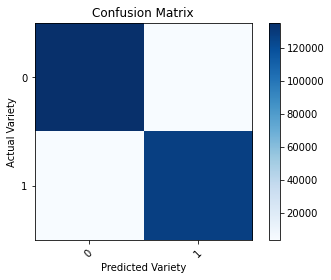

In [21]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['0','1']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

AUC: 0.9967618278605312


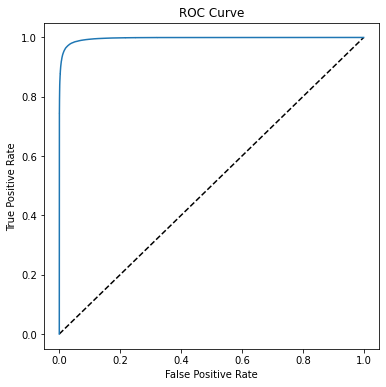

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Step 11: Submit your results

In [23]:
#train the model with complete dataset

model.fit(train_df,y)

# Get predictions from test data
pred_target = model.predict(test_df)

In [24]:
sample_submission_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv')
sample_submission_df['target'] = pred_target
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,id,target
0,900000,1
1,900001,1
2,900002,0
3,900003,0
4,900004,1


# Conclusion

Works Cited:
 - [Build, train and evaluate models with TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests/tutorials/beginner_colab) from @[tensorflow](https://www.tensorflow.org/decision_forests/tutorials/)
  - Code snippets for model training visualization 
  - See comments in plot_tfdf_model_training_curves() for more detail
 - [[TPS-MAY-22] EDA & LGBM Model](https://www.kaggle.com/code/cabaxiom/tps-may-22-eda-lgbm-model) from @[cabaxiom](https://www.kaggle.com/cabaxiom)
  - Feature engineering code snippets
  - See comments in expand_feature_27() for more detail
 - [TPSMAY22 Gradient-Boosting Quickstart](https://www.kaggle.com/code/ambrosm/tpsmay22-gradient-boosting-quickstart) from @[ambrosm](https://www.kaggle.com/ambrosm)
  - Feature engineering code snippets
  - See comments in expand_feature_27() for more detail


Other Useful References:
 - https://www.tensorflow.org/decision_forests/tutorials/beginner_colab
 - https://www.tensorflow.org/decision_forests/tutorials/intermediate_colab
 - https://www.tensorflow.org/decision_forests/tutorials/advanced_colab